
# OTA_HotelRatePlanNotifRQ

Analysis is done on basis of 8 files that were processed at 1st of December 2021.


## Import the relevant libraries

In [189]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

## Load all parquet files that were available with that message

In [190]:
HotelRatePlanNotifRQ_Messages = pd.read_parquet("Documents/ota_ugo", engine='auto')
HotelRatePlanNotifRQ_Messages

,HotelRatePlanNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': '49c6cb3...
1,[{'MessageMeta': {'X-Correlation-ID': 'c82122e...
2,[{'MessageMeta': {'X-Correlation-ID': '966c2f7...
3,[{'MessageMeta': {'X-Correlation-ID': 'd826544...
4,[{'MessageMeta': {'X-Correlation-ID': '5afdec3...
5,[{'MessageMeta': {'X-Correlation-ID': '62ad627...
6,[{'MessageMeta': {'X-Correlation-ID': 'd6d8f7d...
7,[{'MessageMeta': {'X-Correlation-ID': 'a4264a1...
8,[{'MessageMeta': {'X-Correlation-ID': '7a4dd52...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [191]:
firstLevel = []
for index, level in HotelRatePlanNotifRQ_Messages.iterrows():
    if index !=2:
        firstLevel.extend(HotelRatePlanNotifRQ_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [192]:
def resolveNestedArray(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def unnestFile(li, key_level=""):
    listOfUnnested = []
    for level in li:
        row_data = None
        level1 = {}
        for key, value in level.items():
            if isinstance(value, np.ndarray):
                row_data = unnestFile(value, key)
            elif isinstance(value, dict):
                level1.update(value)
            else:
                level1[key_level+"_"+ key] = value

        if row_data is not None:
            newDi = resolveNestedArray(level1, row_data)
            listOfUnnested.extend(newDi)
        else:
            listOfUnnested.append(level1)
    return listOfUnnested


def prepareForDF(firstLevel):
    levelTemp = unnestFile(firstLevel)
    while any(isinstance(n, dict) for n in levelTemp[0].values())|any(isinstance(m, np.ndarray) for m in levelTemp[0].values()):
        newL = unnestFile(levelTemp)
        levelTemp = newL
    return levelTemp              

final = prepareForDF(firstLevel)

### Creating DataFrame<hr>

In [193]:
finalData_raw = pd.DataFrame(final)
finalData_raw.columns = [re.sub("^_+","",x) for x in finalData_raw.columns]
finalData_raw

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,HotelCode,ChainCode,...,Rate_LengthOfStay,Rate_StayOfThrough,Rate_AdvancedBooking,Rate_OriginalData,BaseByGuestAmt_NumberOfGuests,BaseByGuestAmt_AgeQualifyingCode,BaseByGuestAmt_AmountAfterTax,BaseByGuestAmt_AmountBeforeTax,BaseByGuestAmt_DecimalPlaces,BaseByGuestAmt_CurrencyCode
0,49c6cb38-702e-4a32-96fd-78015830551c,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,189.0,189.0,None,None
1,49c6cb38-702e-4a32-96fd-78015830551c,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,189.0,189.0,None,None
2,c82122ed-7122-4a22-9ea5-90ddaceaf3b0,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,None,None,None,,2,10,312.0,312.0,None,None
3,c82122ed-7122-4a22-9ea5-90ddaceaf3b0,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,None,None,None,,2,10,312.0,312.0,None,None
4,332c3e57-8484-48a1-b791-a7a8106e6549,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,None,None,None,,2,10,312.0,312.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,86b730d5-704c-4708-91f4-7e6fde78a455,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,218.0,218.0,None,None
3338,7de8a3ed-c921-4fa4-815e-628e091c2ef5,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,189.0,189.0,None,None
3339,7de8a3ed-c921-4fa4-815e-628e091c2ef5,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,189.0,189.0,None,None
3340,a6cc1f28-f0a8-4db6-8b0a-5931ea2b641d,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,None,None,None,,2,10,189.0,189.0,None,None


### Adding column with difference between Start and End date

In [194]:
from datetime import datetime
finalData_raw["Start_2"] = [datetime.strptime(x, '%Y-%m-%d') for x in finalData_raw.Rate_Start]
finalData_raw["End_2"] = [datetime.strptime(x, '%Y-%m-%d') for x in finalData_raw.Rate_End]
finalData_raw["TimeDiff"] = (finalData_raw["End_2"] - finalData_raw["Start_2"])

In [195]:
HotelRatePlanNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [196]:
HotelRatePlanNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   X-Correlation-ID                  3342 non-null   object         
 1   Type                              3342 non-null   object         
 2   AppId                             3342 non-null   object         
 3   PrimaryLangID                     0 non-null      object         
 4   EchoToken                         0 non-null      object         
 5   TimeStamp                         0 non-null      object         
 6   Version                           0 non-null      object         
 7   Target                            0 non-null      object         
 8   HotelCode                         3342 non-null   object         
 9   ChainCode                         3324 non-null   object         
 10  HotelName                         0 

In [197]:
HotelRatePlanNotifRQ.head(10)

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,HotelCode,ChainCode,...,Rate_OriginalData,BaseByGuestAmt_NumberOfGuests,BaseByGuestAmt_AgeQualifyingCode,BaseByGuestAmt_AmountAfterTax,BaseByGuestAmt_AmountBeforeTax,BaseByGuestAmt_DecimalPlaces,BaseByGuestAmt_CurrencyCode,Start_2,End_2,TimeDiff
0,49c6cb38-702e-4a32-96fd-78015830551c,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,,2,10,189.0,189.0,None,None,2021-11-02,2021-11-02,0 days
1,49c6cb38-702e-4a32-96fd-78015830551c,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT130002,GRT,...,,2,10,189.0,189.0,None,None,2021-11-02,2021-11-02,0 days
2,c82122ed-7122-4a22-9ea5-90ddaceaf3b0,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,,2,10,312.0,312.0,None,None,2021-11-02,2021-11-02,0 days
3,c82122ed-7122-4a22-9ea5-90ddaceaf3b0,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,,2,10,312.0,312.0,None,None,2021-11-02,2021-11-02,0 days
4,332c3e57-8484-48a1-b791-a7a8106e6549,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,,2,10,312.0,312.0,None,None,2021-11-02,2021-11-02,0 days
5,332c3e57-8484-48a1-b791-a7a8106e6549,OTA_HotelRatePlanNotifRQ,shiji,None,None,None,None,None,GRT003014,GRT,...,,2,10,312.0,312.0,None,None,2021-11-02,2021-11-02,0 days
6,d826544e-c2e3-42fc-a9db-6d4b4435fb88,OTA_HotelRatePlanNotifRQ,synxis,None,None,None,None,None,62942,None,...,,1,8,210,210,None,None,2022-11-02,2022-11-03,1 days
7,d826544e-c2e3-42fc-a9db-6d4b4435fb88,OTA_HotelRatePlanNotifRQ,synxis,None,None,None,None,None,62942,None,...,,1,8,210,210,None,None,2022-11-02,2022-11-03,1 days
8,d826544e-c2e3-42fc-a9db-6d4b4435fb88,OTA_HotelRatePlanNotifRQ,synxis,None,None,None,None,None,62942,None,...,,1,8,210,210,None,None,2022-11-02,2022-11-03,1 days
9,1768ad7b-8c12-46e2-913a-03e22acfe76e,OTA_HotelRatePlanNotifRQ,synxis,None,None,None,None,None,62942,None,...,,1,8,210,210,None,None,2022-11-02,2022-11-03,1 days


### Basic statistic for data<hr>

In [198]:
HotelRatePlanNotifRQ.describe(include="all").transpose()

/home/agata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
X-Correlation-ID,3342,375,aa58386f-2216-4be4-836e-842b6252f7f2,60,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Type,3342,1,OTA_HotelRatePlanNotifRQ,3342,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AppId,3342,2,shiji,3324,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
PrimaryLangID,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
EchoToken,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BaseByGuestAmt_DecimalPlaces,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
BaseByGuestAmt_CurrencyCode,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Start_2,3342,42,2022-03-03 00:00:00,840,2021-11-02,2022-11-02,NaT,NaT,NaT,NaT,NaT,NaT,NaT
End_2,3342,41,2022-03-03 00:00:00,840,2021-11-02,2022-11-03,NaT,NaT,NaT,NaT,NaT,NaT,NaT


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [199]:
HotelRatePlanNotifRQ = HotelRatePlanNotifRQ.drop(columns=["PrimaryLangID","EchoToken","TimeStamp","Version","Target",
                                                         "HotelName","RatePlan_RatePlanCode","RatePlan_RatePlanType","RatePlan_RatePlanStatusType",
                                                         "RatePlan_Start","RatePlan_End","RatePlan_BaseOccupancy","RatePlan_BookingRules","RatePlan_SellableProducts",
                                                         "RatePlan_Description","RatePlan_RatePlanLevelFee","Rate_AdditionalGuestAmounts","Rate_CancelPolicies",
                                                         "Rate_PaymentPolicies","Rate_MealsIncluded","Rate_Fees","Rate_GuaranteePolicies","Rate_RateDescription",
                                                         "Rate_MaxLOS","Rate_MinLOS","Rate_RateTimeUnit","Rate_Restrictions","Rate_LengthOfStay","Rate_StayOfThrough",
                                                         "Rate_AdvancedBooking","BaseByGuestAmt_DecimalPlaces","BaseByGuestAmt_CurrencyCode"])

In [200]:
HotelRatePlanNotifRQ.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TimeDiff,3342,0 days 00:09:02.908438061,0 days 03:07:52.224937978,0 days,0 days,0 days,0 days,4 days


#### Checking null values for hotelCode

In [201]:
HotelRatePlanNotifRQ.HotelCode.isna().sum()

0

#### Checking unique values for hotelCode

In [202]:
HotelRatePlanNotifRQ.HotelCode.unique()

array(['GRT130002', 'GRT003014', '62942'], dtype=object)

#### Creating sub DataFrames for each hotel to check statisctics per hotel

In [203]:
GRT130002 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='GRT130002']
GRT003014 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='GRT003014']
hotel62942 = HotelRatePlanNotifRQ.loc[HotelRatePlanNotifRQ.HotelCode=='62942']

#### Base statistics for each hotel

In [207]:
GRT130002.describe(include='all').transpose()

/home/agata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
X-Correlation-ID,1436,110,104b9dbc-5614-4d7b-b5ce-34da3f450be0,60,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Type,1436,1,OTA_HotelRatePlanNotifRQ,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AppId,1436,1,shiji,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HotelCode,1436,1,GRT130002,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ChainCode,1436,1,GRT,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
TPA_Extensions,1436,1,,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_CurrencyCode,1436,1,CNY,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanID,1436,1,WHL10,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanNotifType,1436,1,Overlay,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_OriginalData,1436,1,,1436,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [208]:
GRT003014.describe(include="all").transpose()

/home/agata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
X-Correlation-ID,1888,259,aa58386f-2216-4be4-836e-842b6252f7f2,60,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Type,1888,1,OTA_HotelRatePlanNotifRQ,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AppId,1888,1,shiji,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HotelCode,1888,1,GRT003014,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ChainCode,1888,1,GRT,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
TPA_Extensions,1888,1,,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_CurrencyCode,1888,1,CNY,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanID,1888,1,WHL10,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanNotifType,1888,1,Overlay,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_OriginalData,1888,1,,1888,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [209]:
hotel62942.describe(include="all").transpose()

/home/agata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
X-Correlation-ID,18,6,d826544e-c2e3-42fc-a9db-6d4b4435fb88,3,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Type,18,1,OTA_HotelRatePlanNotifRQ,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AppId,18,1,synxis,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HotelCode,18,1,62942,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ChainCode,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
TPA_Extensions,18,1,,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_CurrencyCode,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanID,18,1,BIOTBH,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_RatePlanNotifType,0,0,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlan_OriginalData,18,1,,18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


#### Checking null values for NumberofGuests

In [210]:
HotelRatePlanNotifRQ.BaseByGuestAmt_NumberOfGuests.isna().sum()

0

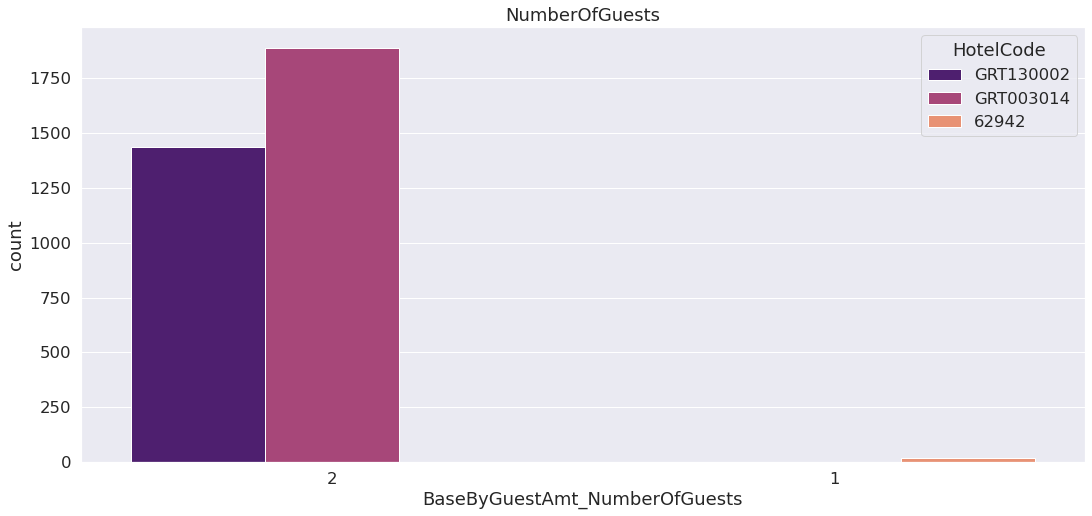

In [211]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.BaseByGuestAmt_NumberOfGuests, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('NumberOfGuests')
plt.show()

#### Checking for null values for AgeQualifyingCode column

In [212]:
HotelRatePlanNotifRQ.BaseByGuestAmt_AgeQualifyingCode.isna().sum()

0

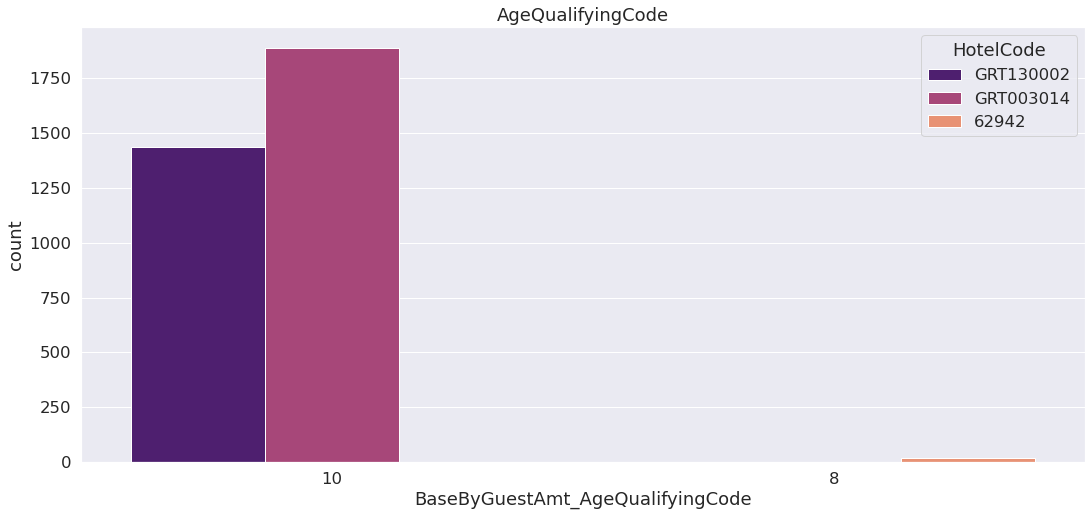

In [213]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.BaseByGuestAmt_AgeQualifyingCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('AgeQualifyingCode')
plt.show()

#### Checking against null values for AmountAfterTax

In [214]:
HotelRatePlanNotifRQ.BaseByGuestAmt_AmountAfterTax.isna().sum()

0

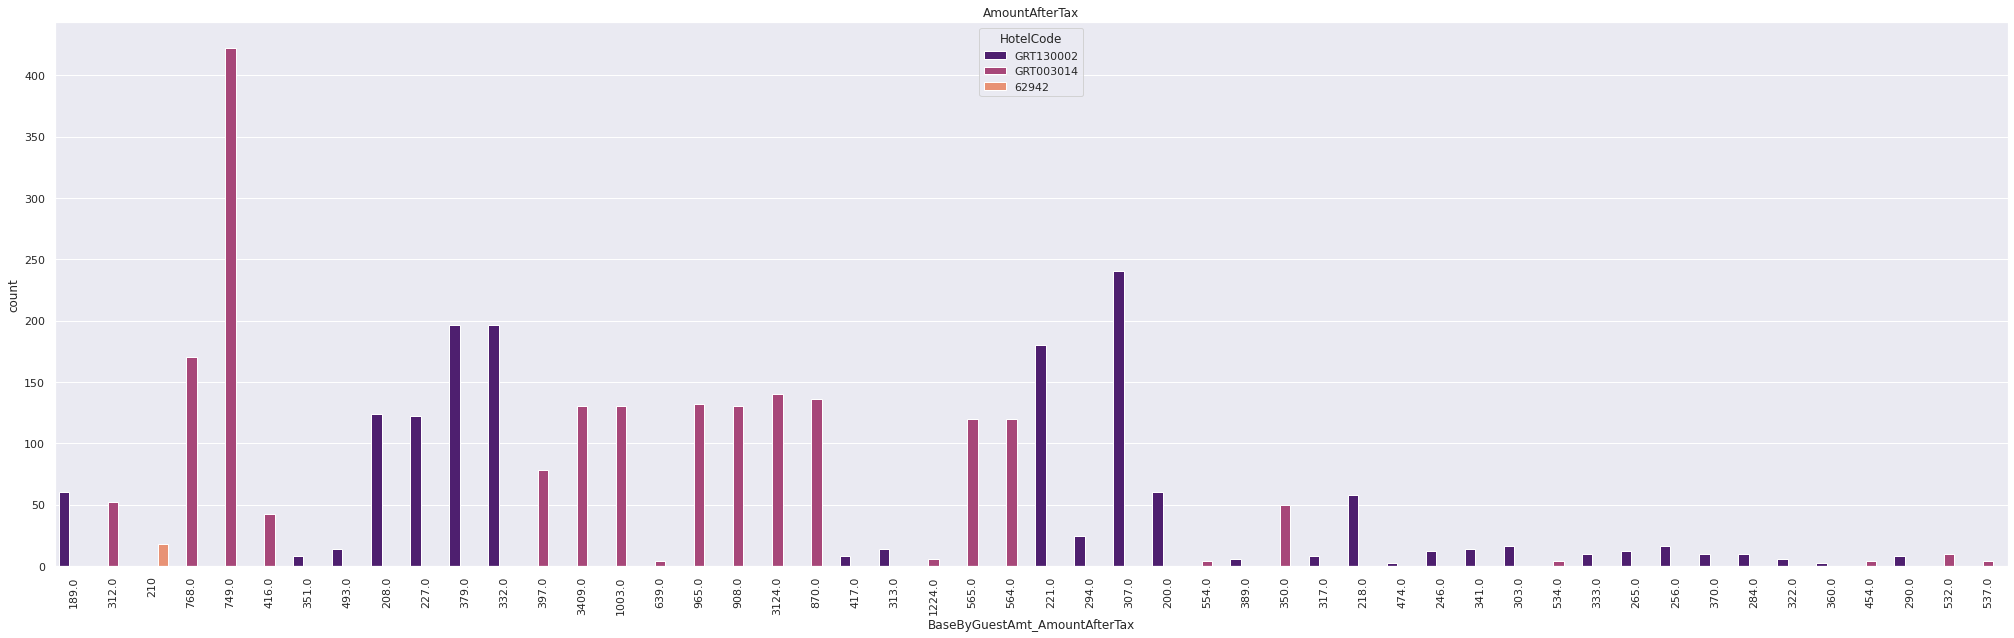

In [215]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.BaseByGuestAmt_AmountAfterTax, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.xticks(rotation=90)
plt.title('AmountAfterTax')
plt.show()

#### Checking against null values for AmountBeforeTax

In [216]:
HotelRatePlanNotifRQ.BaseByGuestAmt_AmountBeforeTax.isna().sum()

0

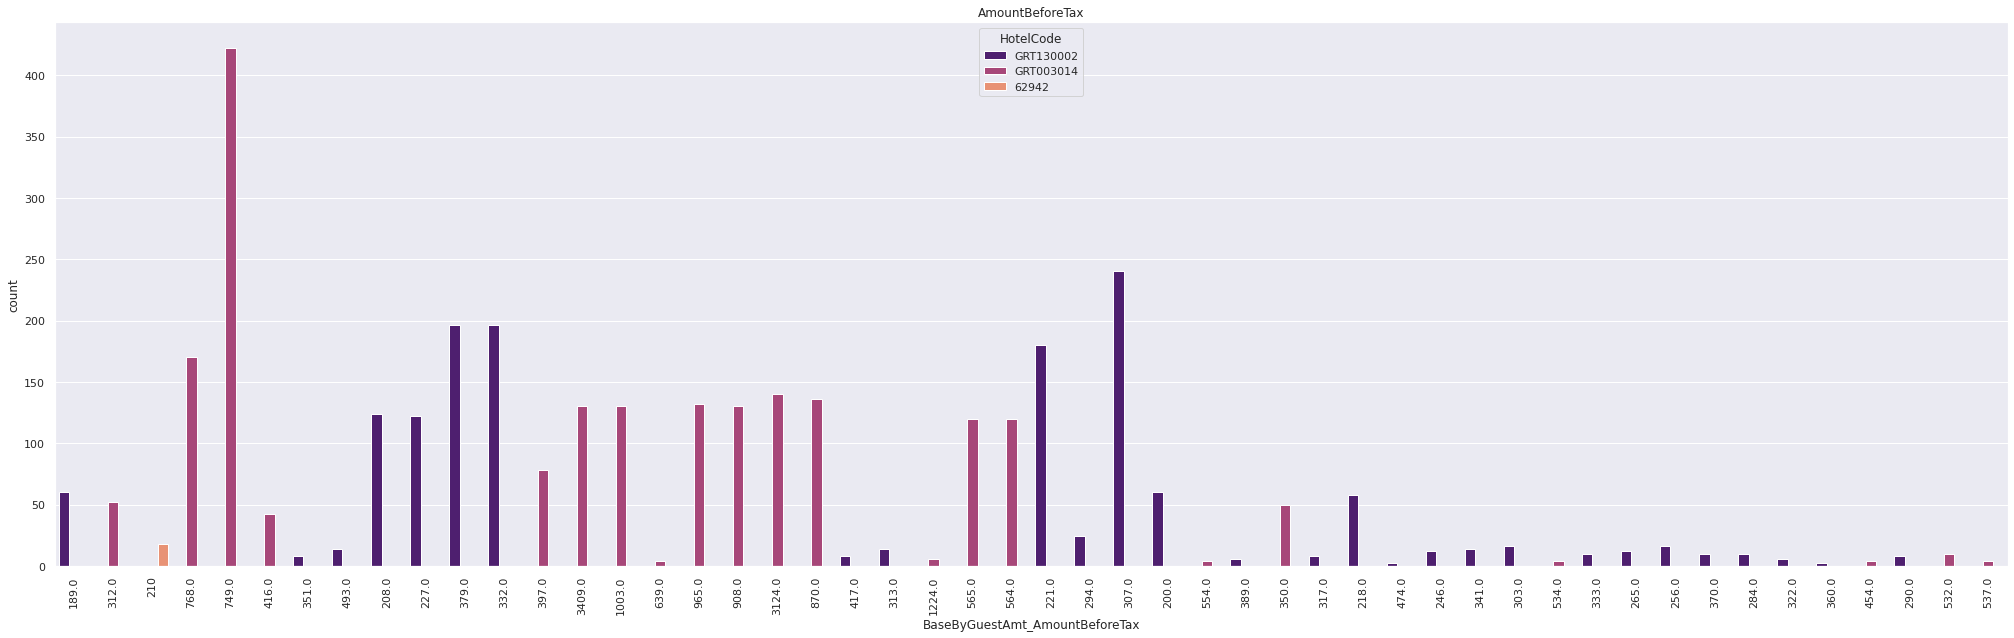

In [217]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.BaseByGuestAmt_AmountBeforeTax, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.xticks(rotation=90)
plt.title('AmountBeforeTax')
plt.show()

#### Checking against null values for RatePlanID

In [218]:
HotelRatePlanNotifRQ.RatePlan_RatePlanID.isna().sum()

0

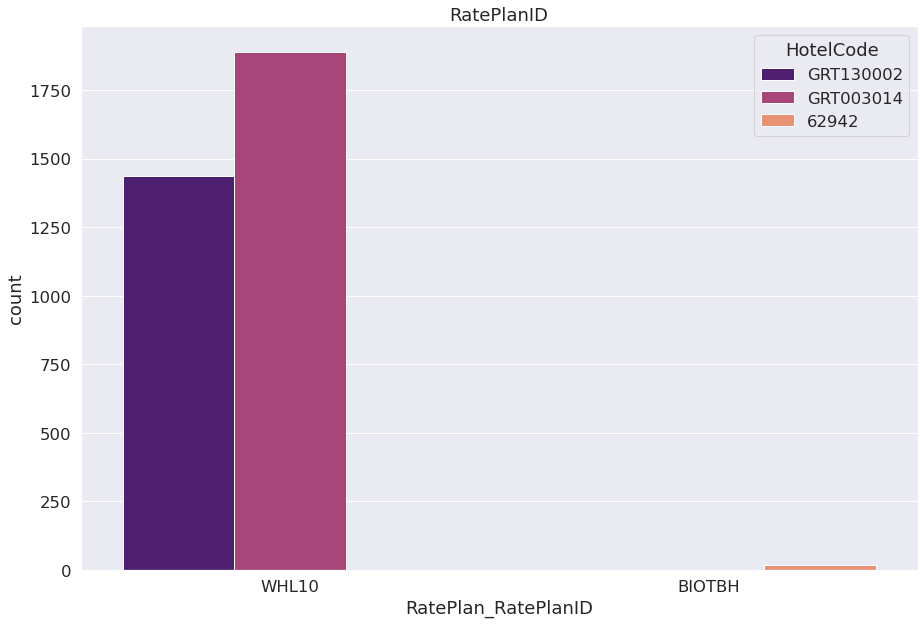

In [219]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.RatePlan_RatePlanID, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('RatePlanID')
plt.show()

#### Checking against null values for InvTypeCode

In [220]:
HotelRatePlanNotifRQ.Rate_InvTypeCode.isna().sum()

3324

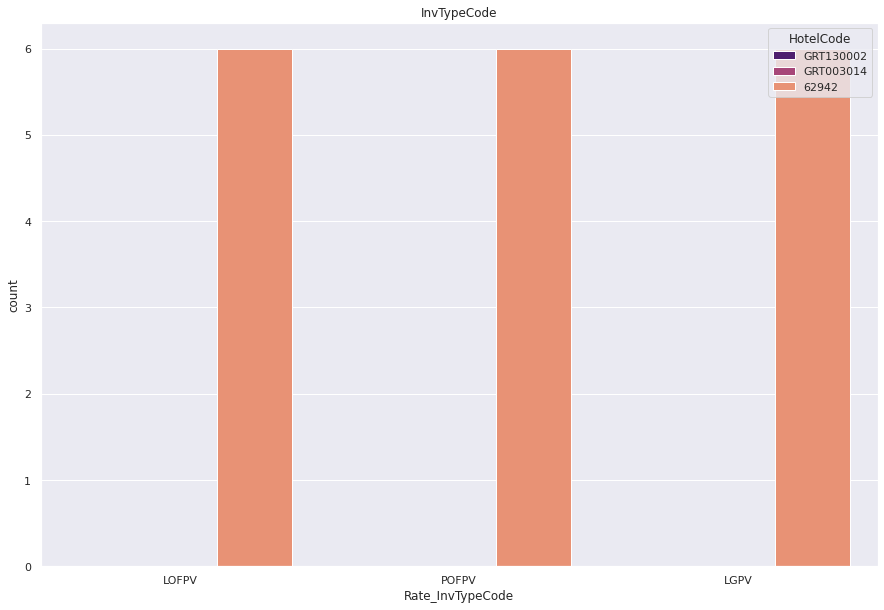

In [221]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_InvTypeCode, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('InvTypeCode')
plt.show()

#### Checking against null values forInvCode

In [222]:
HotelRatePlanNotifRQ.Rate_InvCode.isna().sum()

18

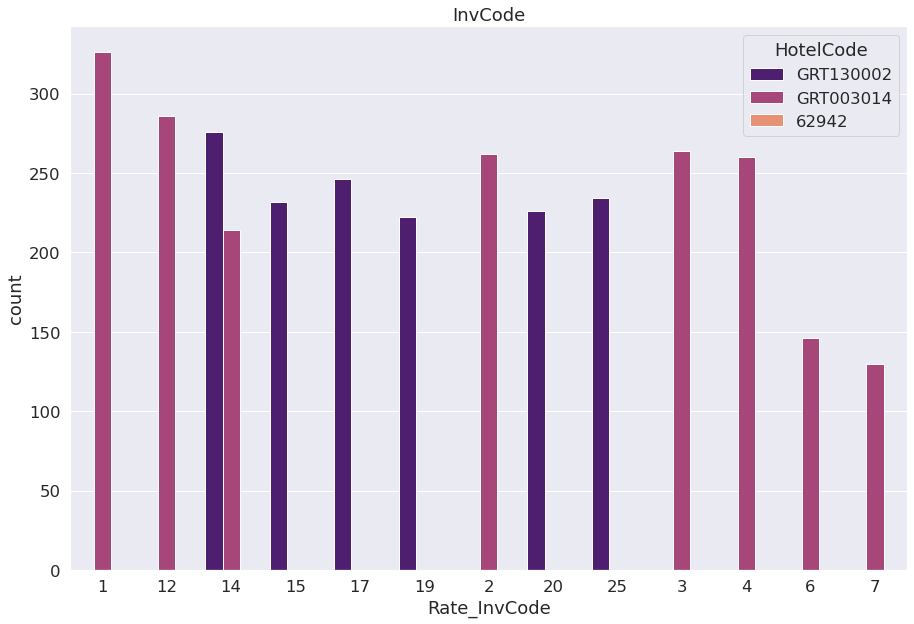

In [223]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_InvCode.sort_values(), hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('InvCode')
plt.show()

#### Checking against null values for AppId

In [224]:
HotelRatePlanNotifRQ.AppId.isna().sum()

0

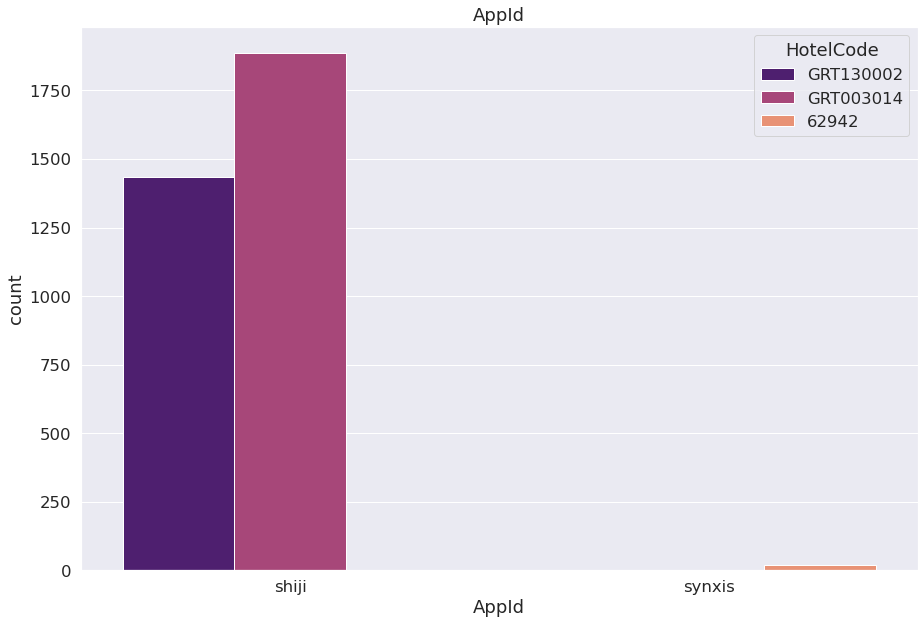

In [225]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.AppId, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('AppId')
plt.show()

#### Checking against null values for UnitMultiplier

In [226]:
HotelRatePlanNotifRQ.Rate_UnitMultiplier.isna().sum()

18

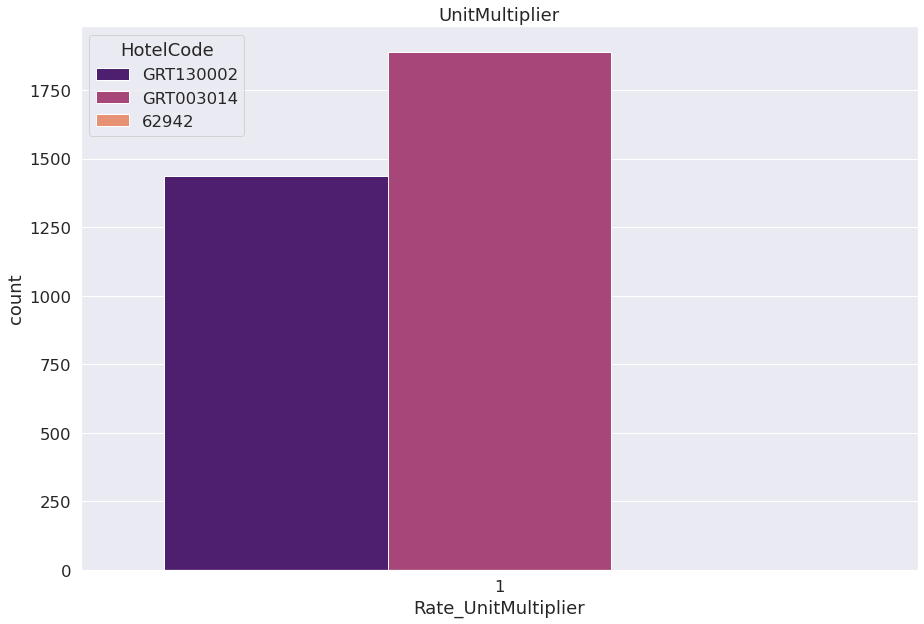

In [227]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_UnitMultiplier, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('UnitMultiplier')
plt.show()

#### Checking against null values for OriginalData

In [228]:
HotelRatePlanNotifRQ.Rate_OriginalData.isna().sum()

0

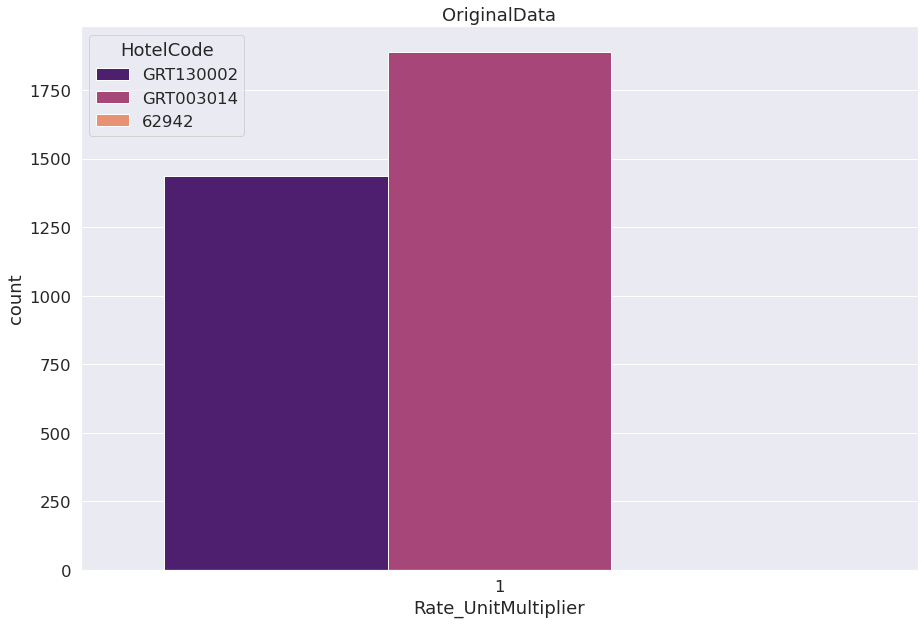

In [229]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_UnitMultiplier, hue = HotelRatePlanNotifRQ.HotelCode, data = HotelRatePlanNotifRQ, palette = 'magma')
plt.title('OriginalData')
plt.show()

#### Checking null values for Start

In [230]:
HotelRatePlanNotifRQ.Rate_Start.isna().sum()

0

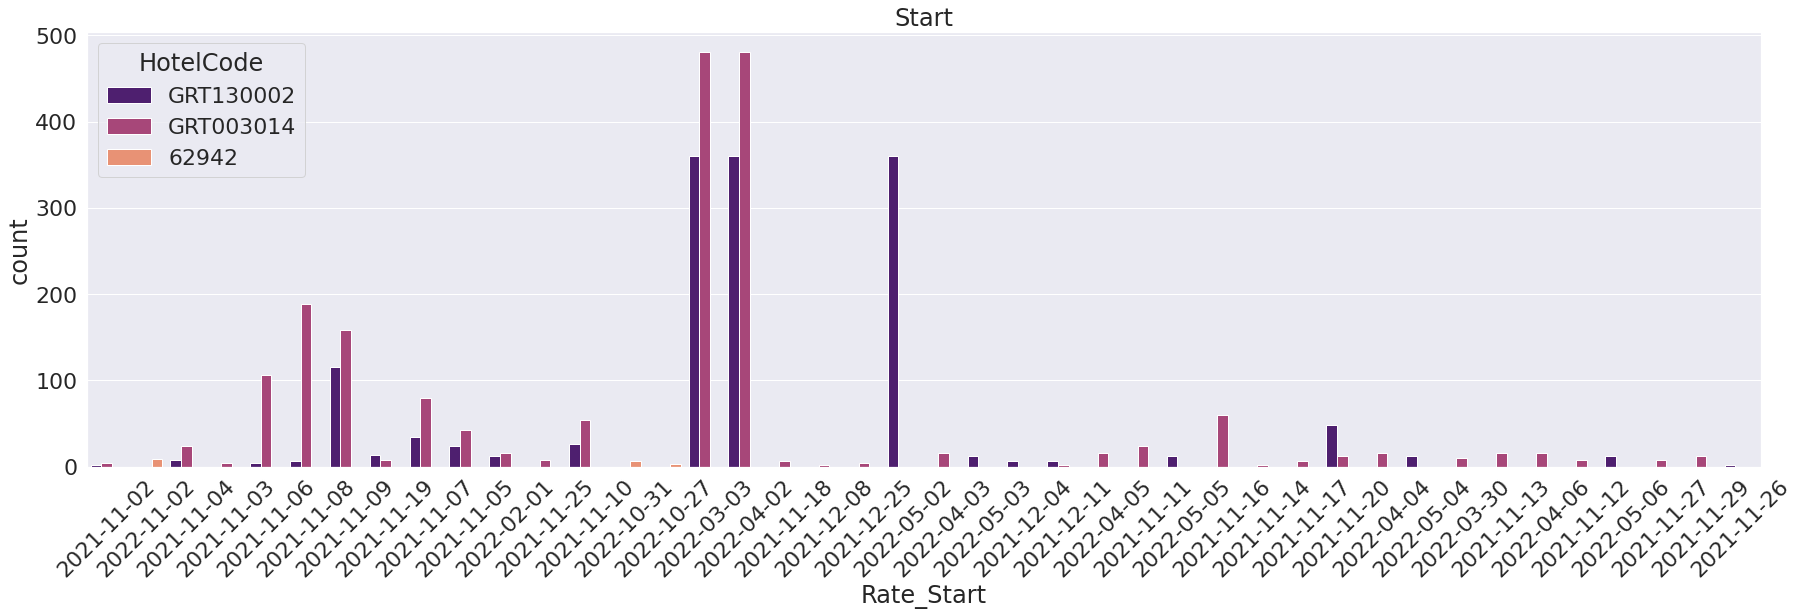

In [231]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_Start, data = HotelRatePlanNotifRQ, hue = HotelRatePlanNotifRQ.HotelCode,palette = 'magma')
plt.xticks(rotation=45)
plt.title('Start')
plt.show()

#### Checking null values for End

In [232]:
HotelRatePlanNotifRQ.Rate_End.isna().sum()

0

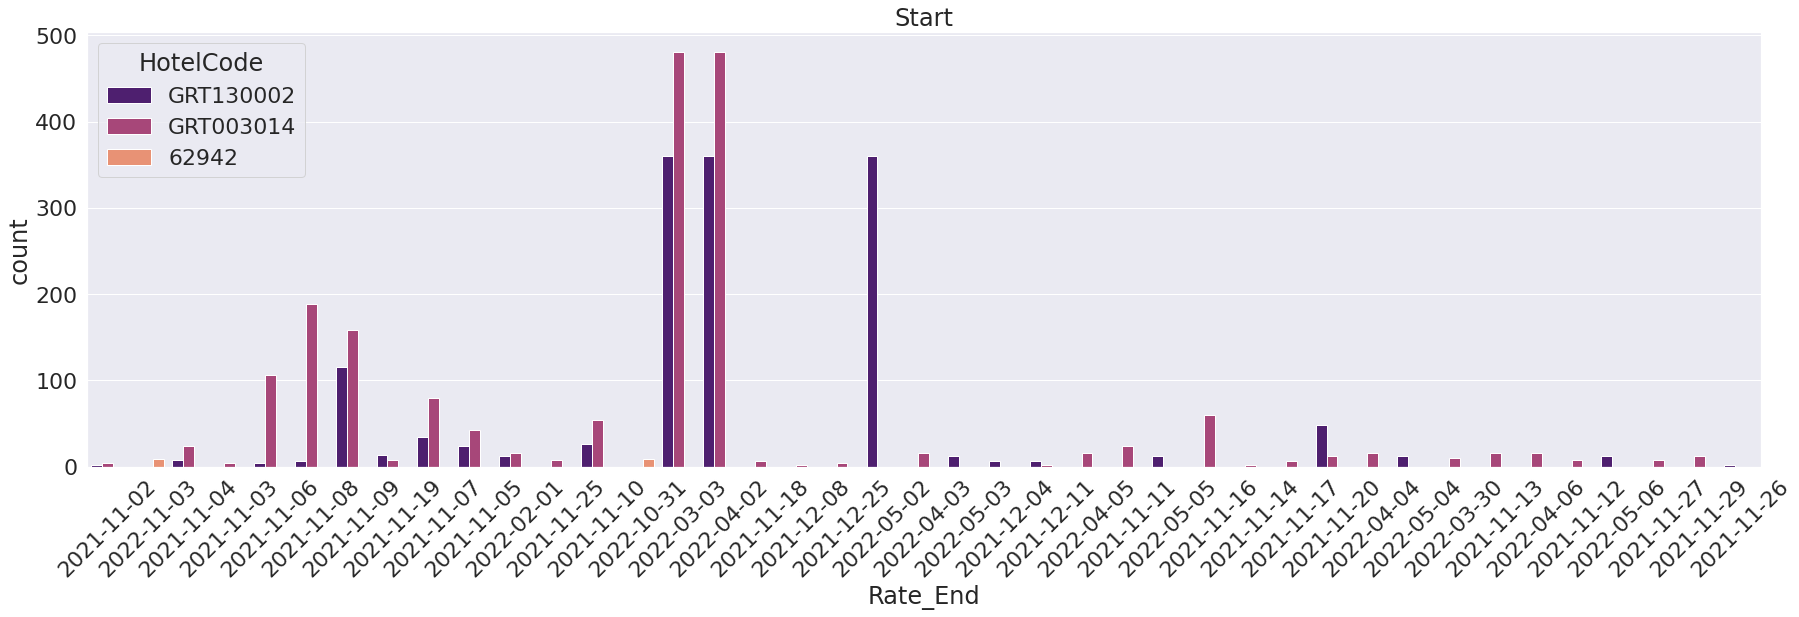

In [233]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelRatePlanNotifRQ.Rate_End, data = HotelRatePlanNotifRQ, hue = HotelRatePlanNotifRQ.HotelCode,palette = 'magma')
plt.xticks(rotation=45)
plt.title('Start')
plt.show()

In [234]:
HotelRatePlanNotifRQ["TimeDiff"] = [x.days for x in HotelRatePlanNotifRQ["TimeDiff"]]

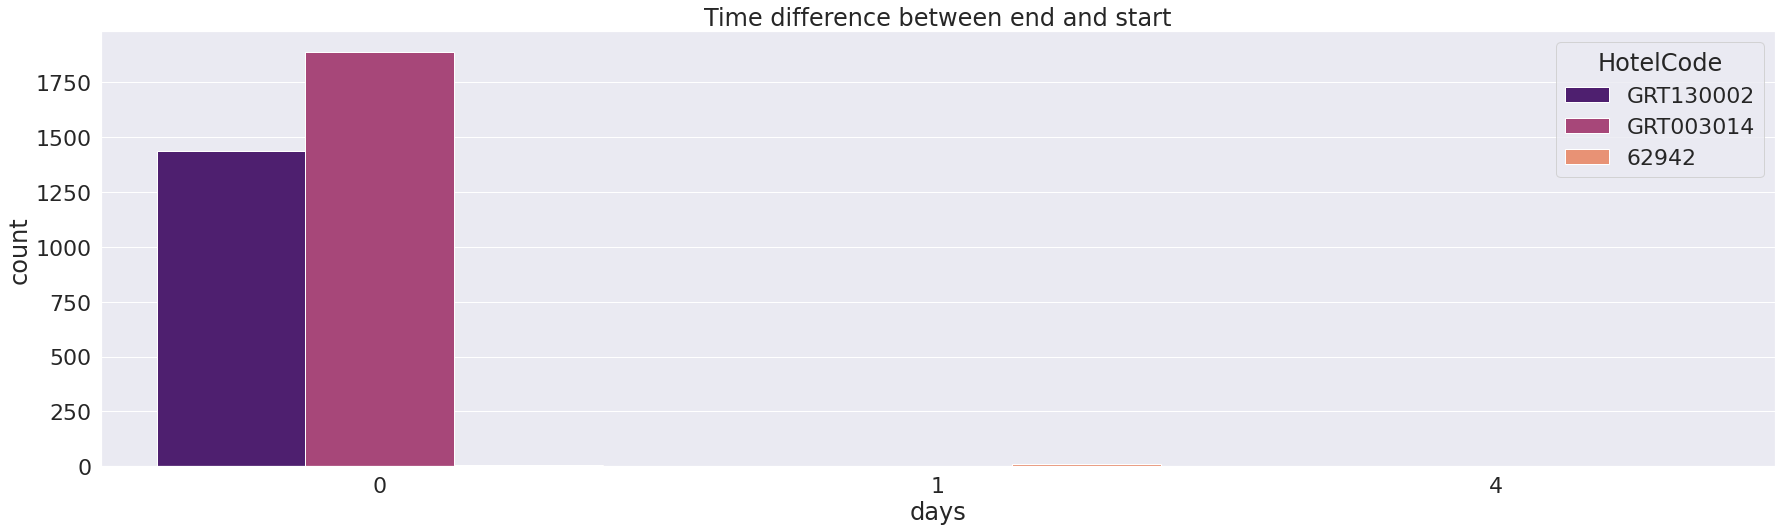

In [235]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelRatePlanNotifRQ.TimeDiff, data = HotelRatePlanNotifRQ, hue = HotelRatePlanNotifRQ.HotelCode,palette = 'magma')
plt.title('Time difference between end and start')
plt.xlabel("days")
plt.show()